# MATLAB on Google Colab

This is the example that will be covered in this notebook:
https://www.mathworks.com/help/deeplearning/ug/time-series-forecasting-using-deep-learning.html

- Start by changing the runtime to a GPU
- Execute the following bash script to get MATLAB:
https://gist.github.com/yanndebray/e267617c78a3f24c875cb57570bdd3b9
- Add more toolboxes as needed to the line `mpm install --products=MATLAB Parallel_Computing_Toolbox Deep_Learning_Toolbox Statistics_and_Machine_Learning_Toolbox`
https://www.mathworks.com/help/install/ug/mpminstall.html
(you can get the list from this page, replace the spaces by underscores_ https://www.mathworks.com/products.html)


More resources:
- https://blogs.mathworks.com/deep-learning/2023/07/26/matlab-with-tensorflow-from-your-jupyter-notebook/
- https://www.mathworks.com/help/deeplearning/ref/exportnetworktotensorflow.html

In [ ]:
!nvidia-smi

Tue Aug 12 20:04:16 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   41C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!wget https://gist.github.com/yanndebray/e267617c78a3f24c875cb57570bdd3b9/raw/c840eae32fb8be4b0b90fc852b43f719ec89bbff/get_matlab_on_colab.sh

--2025-08-12 19:40:37--  https://gist.github.com/yanndebray/e267617c78a3f24c875cb57570bdd3b9/raw/1b9dce314770da627ecaf162bc1a3ecc5748a999/get_matlab_on_colab.sh
Resolving gist.github.com (gist.github.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to gist.github.com (gist.github.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 755 [text/plain]
Saving to: ‘get_matlab_on_colab.sh’

get_matlab_on_colab 100%[===================>]     755  --.-KB/s    in 0s      

2025-08-12 19:40:38 (35.2 MB/s) - ‘get_matlab_on_colab.sh’ saved [755/755]



In [ ]:
!chmod +x get_matlab_on_colab.sh

In [ ]:
# !./get_matlab_on_colab.sh # run in the terminal

In [ ]:
from google.colab import output
output.serve_kernel_port_as_window(3000, path='/')

Try `serve_kernel_port_as_iframe` instead. 


<IPython.core.display.Javascript object>

In [ ]:
import forecastTF
model = forecastTF.load_model()

In [ ]:
# model.layers
# model.input_shape
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, None, 3)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_ (LSTM)                    │ (None, None, 128)      │        67,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_ (Dense)                     │ (None, None, 3)        │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,971 (265.51 KB)

 Trainable params: 67,971 (265.51 KB)

 Non-trainable params: 0 (0.00 B)

On the MATLAB side, share the engine with the command [matlab.engine.shareEngine](https://www.mathworks.com/help/matlab/ref/matlab.engine.shareengine.html)

In [ ]:
import matlab.engine
eng = matlab.engine.find_matlab()[0] # attach to running session
m = matlab.engine.connect_matlab(eng)
# m.who()

In [ ]:
import numpy as np
X = m.workspace['X']
X = np.array(X)
X = np.expand_dims(X, axis=0)
X.shape

(1, 191, 3)

In [ ]:
Y = model.predict(X)

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 191, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 56s 56s/step


In [ ]:
Y.shape

(1, 191, 3)

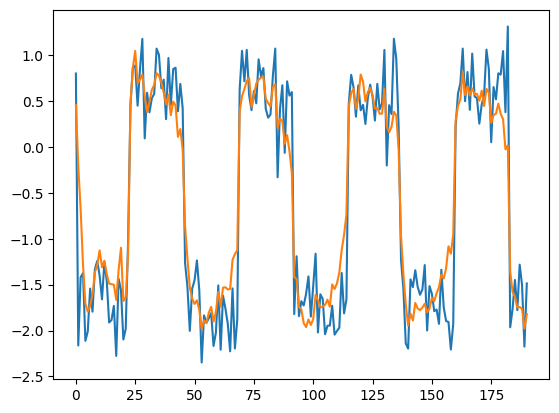

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X[0,:,0])
plt.plot(Y[0,:,0])